In [50]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

df = pd.read_csv("mtcars.csv")

In [13]:
# 상위 5개 Row 출력
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [14]:
# 하위 5개 Row 출력
df.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [12]:
# Row 개수 출력
df.shape[0]

32

In [19]:
# 컬럼 이름이 없는 컬럼 조회
unnamed_cols = [col for col in df.columns if 'Unnamed' in str(col)]
print(unnamed_cols)

['Unnamed: 0']


In [25]:
# 컬럼 이름이 없는 값 이름 삽입
df = df.rename(columns={'Unnamed: 0': 'model'})

In [27]:
# index dtypes, columns 등 Dataframe 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [29]:
# 각 컬럼의 통계 정보 조회 (평균, 표준편차, 최대/최소 등)
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [33]:
# Gear의 값 개수 출력
df['gear'].nunique()

3

In [35]:
# Transmission 값 개수 출력
df['am'].nunique()

2

In [96]:
# Gear와 Transmission 조합 및 조합 별 차량 개수

# 방법 1: crosstab을 사용한 방법
gear_am_ct = pd.crosstab(df['gear'], df['am'])
gear_am_ct

am,0,1
gear,,
3,15,0
4,4,8
5,0,5


In [95]:
# Gear와 Transmission 조합 및 조합 별 차량 개수

# 방법 2: crosstab을 사용하지 않는 방법 - groupby 사용
gear_am_comb = df.groupby(['gear', 'am']).size().reset_index(name='count')
gear_am_comb

,gear,am,count
0,3,0,15
1,4,0,4
2,4,1,8
3,5,1,5


In [51]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.2 MB/s  0:00:01m 6.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 6.5 MB/s  0:00:00m 9.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.1 MB/s  0:00:006.9 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


<Axes: title={'center': '# of Cars by Gear x Transmission'}, xlabel='(Gear, Auto Transmission)', ylabel='# of Cars'>

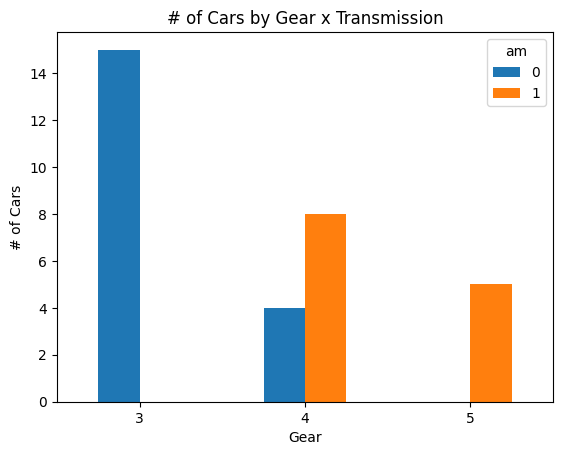

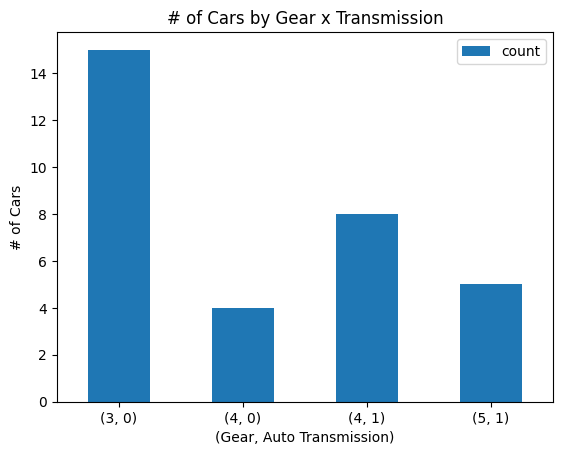

In [100]:
# Gear와 Transmission 조합 및 조합 별 차량 개수를 Bar 그래프로 출력

# 방법 1: crosstab을 사용한 방법
gear_am_ct.plot(
    kind='bar',
    title='# of Cars by Gear x Transmission',
    xlabel='Gear',
    ylabel='# of Cars',
    rot=0
)

# 방법 2: crosstab을 사용하지 않는 방법
gear_am_comb.set_index(['gear', 'am']).plot(
    kind='bar',
    title='# of Cars by Gear x Transmission',
    xlabel='(Gear, Auto Transmission)',
    ylabel='# of Cars',
    rot=0,
)

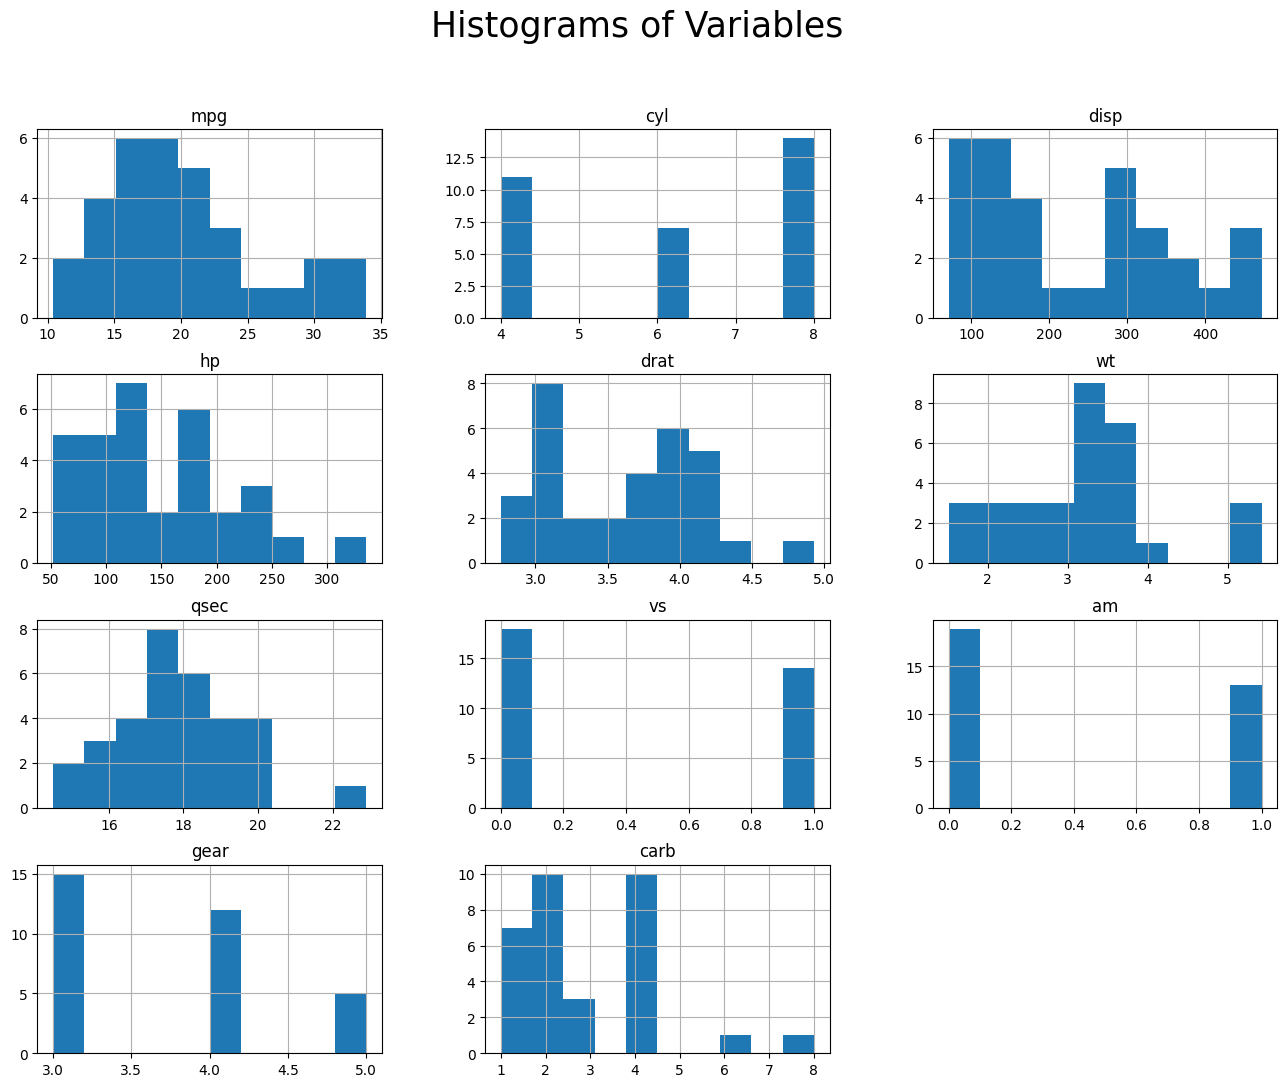

In [80]:
import matplotlib.pyplot as plt

# 1. 히스토그램 그리기
df.hist(figsize=(16, 12))

# 2. 전체 제목 설정
plt.suptitle('Histograms of Variables', fontsize=25) 

plt.show()

<Axes: title={'center': 'Cylinder vs Horse Power'}, xlabel='cyl', ylabel='hp'>

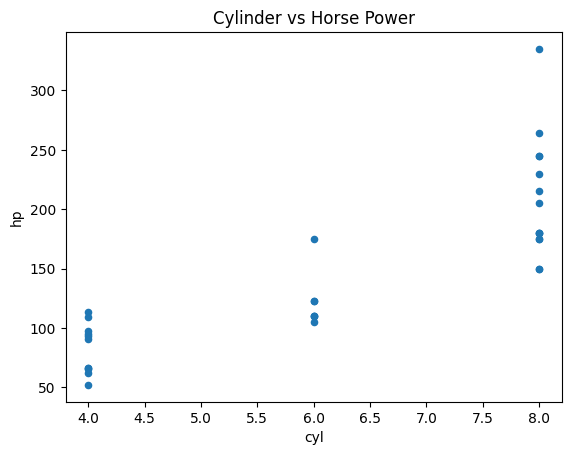

In [85]:
# Cylinder와 HorsePower 간의 Scatter 차트
df.plot.scatter(x='cyl', y='hp', title='Cylinder vs Horse Power')

<Axes: title={'center': 'MPG vs Horse Power'}, xlabel='mpg', ylabel='hp'>

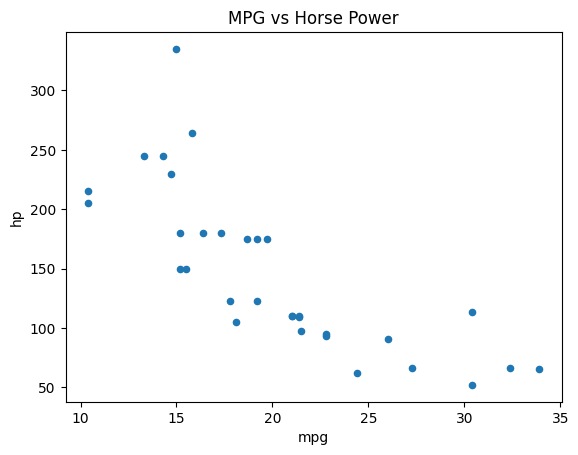

In [86]:
# MPG와 HorsePower간의 Scatter 차트
df.plot.scatter(x='mpg', y='hp', title='MPG vs Horse Power')

In [88]:
# 각 변수들 간의 상관계수 표
df.corr(numeric_only=True)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073
